# IE7374 Project -- Mushroom Classification

### Group 8: Lei Duan, Yue Pang, Yang Yang

# Part 1: Import libraries and mushroom dataset

In [1]:
import sys

sys.path.append("IE7374 project-mushroom classification-Group 8.ipynb")

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
import matplotlib.colors as pltcolors
import math
from tqdm import tqdm
from svm_utils import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import mushroom dataset from uci
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None)
print (df.head())

  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]


In [4]:
# define feature names
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
             'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
             'spore-print-color','population','habitat']
print (df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

# Part 2: Data Preprocessing

In [5]:
# view mushroom dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# check if there is any missing values
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [7]:
# check if there is any outliers
feature_value = []
for i in range(df.shape[1]):
    temp = df.iloc[:,i].drop_duplicates().to_list()
    feature_value.append(temp)
    print(df.columns[i],':',temp)

class : ['p', 'e']
cap-shape : ['x', 'b', 's', 'f', 'k', 'c']
cap-surface : ['s', 'y', 'f', 'g']
cap-color : ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
bruises : ['t', 'f']
odor : ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
gill-attachment : ['f', 'a']
gill-spacing : ['c', 'w']
gill-size : ['n', 'b']
gill-color : ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']
stalk-shape : ['e', 't']
stalk-root : ['e', 'c', 'b', 'r', '?']
stalk-surface-above-ring : ['s', 'f', 'k', 'y']
stalk-surface-below-ring : ['s', 'f', 'y', 'k']
stalk-color-above-ring : ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']
stalk-color-below-ring : ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']
veil-type : ['p']
veil-color : ['w', 'n', 'o', 'y']
ring-number : ['o', 't', 'n']
ring-type : ['p', 'e', 'l', 'f', 'n']
spore-print-color : ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']
population : ['s', 'n', 'a', 'v', 'y', 'c']
habitat : ['u', 'g', 'm', 'd', 'p', 'w', 'l']


# Part 3: Explanatory data analysis

## feature engineering

In [8]:
from sklearn.preprocessing import LabelEncoder

# encode data

le = LabelEncoder()
arr_ec = df.apply(le.fit_transform).values

In [9]:
# transform encoded data into dataframe
df_ec = pd.DataFrame(data = arr_ec,columns=df.columns)

## statistical analysis

In [10]:
# get basic information of mushroom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
# get description information of mushroom dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
# get number of features and munber of samples
num_features = df.shape[1]-1
num_samples = df.shape[0]
print('Number of features:',num_features)
print('Number of samples:',num_samples)

Number of features: 22
Number of samples: 8124


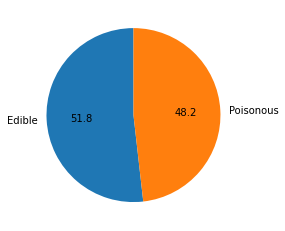

In [13]:
# show the proportion of two classes in the dataset
plt.figure(figsize = (4,4))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = False)
plt.show()

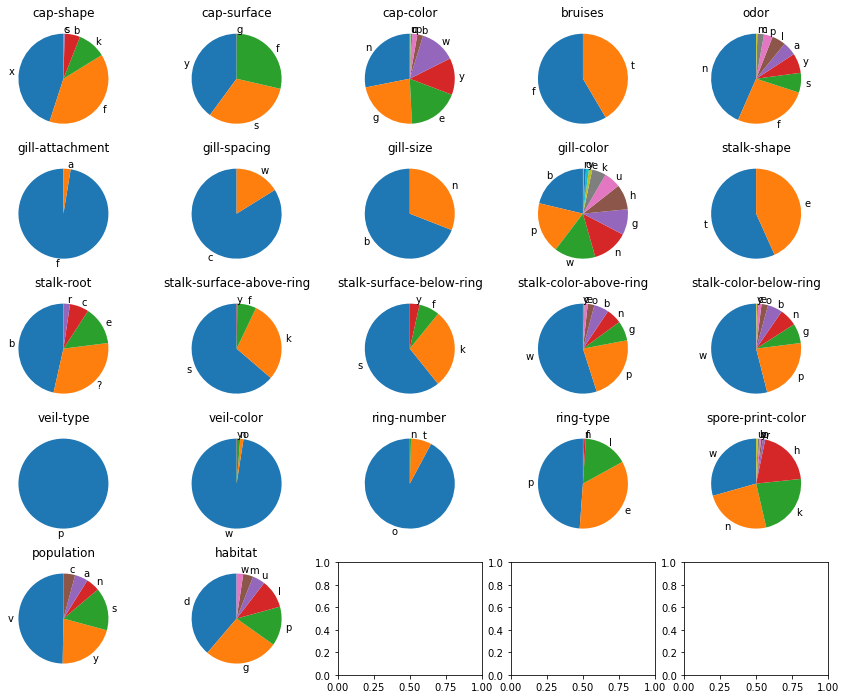

In [14]:
# show the proportion of feature values

fig, axes = plt.subplots(5,5, figsize=(15, 12))

for i in range(1,num_features+1):
    ax = axes[(i-1) // 5, (i-1) % 5]
    col = df.columns[i]
    count = df[col].value_counts()
    ind = count.index.to_list()
    ax.pie(count,labels = ind,startangle = 90)
    ax.set_title(col)
    
fig.subplots_adjust(wspace=.2)

<AxesSubplot:>

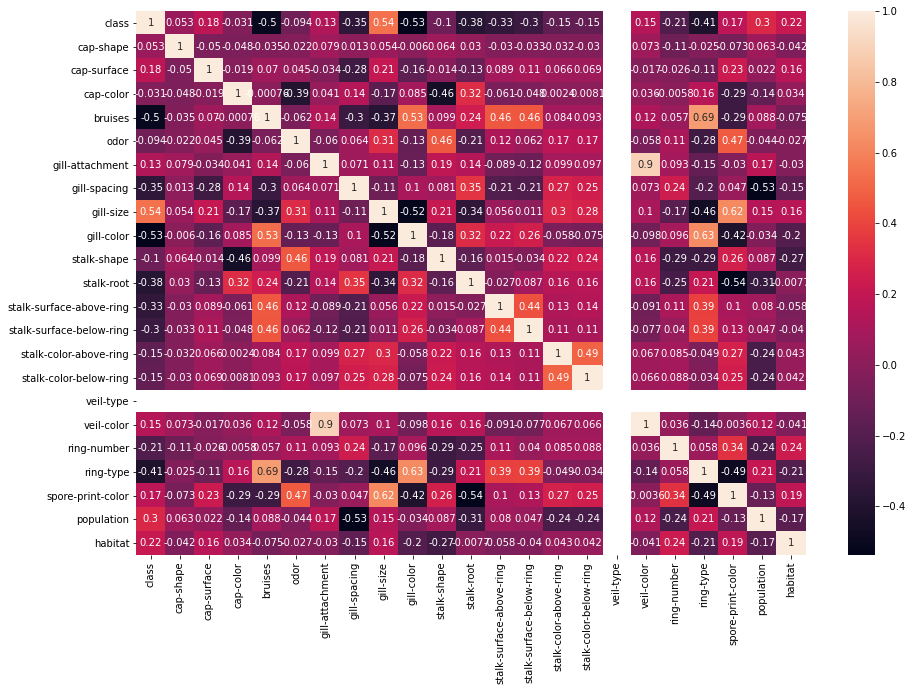

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_ec.corr(), annot=True)

## Feature selection

In [16]:
# remove the feature with low variance
mark =[]

for i in range(1,num_features+1):
    dic = dict()
    col = df.columns[i]
    count = df[col].value_counts()
    ind = count.index.to_list()
    
    for j in range(len(ind)):
        pro = round(count[j]/num_samples,4)
        dic[ind[j]] = pro
        
        if pro > 0.95:
            mark.append(col)
    
    print(col,':')
    print(pd.DataFrame([dic]))

cap-shape :
      x      f       k       b       s       c
0  0.45  0.388  0.1019  0.0556  0.0039  0.0005
cap-surface :
        y       s       f       g
0  0.3993  0.3146  0.2856  0.0005
cap-color :
        n       g       e      y      w       b       p       c      r      u
0  0.2811  0.2265  0.1846  0.132  0.128  0.0207  0.0177  0.0054  0.002  0.002
bruises :
        f       t
0  0.5844  0.4156
odor :
        n       f       s       y       a       l       p       c       m
0  0.4343  0.2659  0.0709  0.0709  0.0492  0.0492  0.0315  0.0236  0.0044
gill-attachment :
        f       a
0  0.9742  0.0258
gill-spacing :
        c       w
0  0.8385  0.1615
gill-size :
        b       n
0  0.6908  0.3092
gill-color :
        b       p      w      n       g       h       u       k       e  \
0  0.2127  0.1837  0.148  0.129  0.0926  0.0901  0.0606  0.0502  0.0118   

        y       o      r  
0  0.0106  0.0079  0.003  
stalk-shape :
        t       e
0  0.5672  0.4328
stalk-root :
        b

In [17]:
# drop the feature that has a dominant feature value
df_ec = df_ec.drop(mark,axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

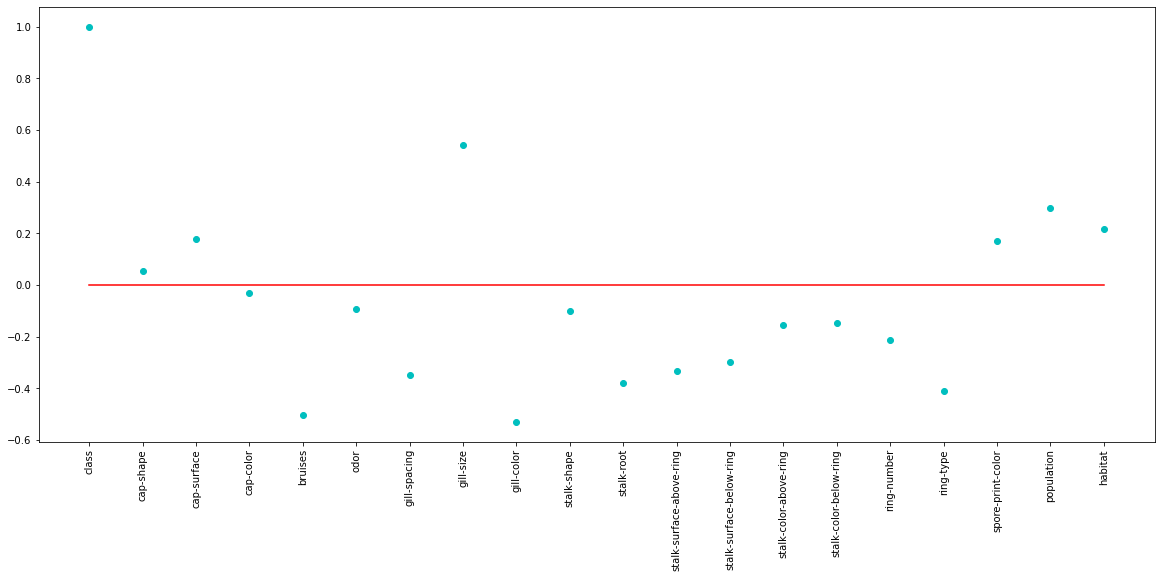

In [18]:
# plot the correlation between class and all features

plt.figure(figsize=(20,8))
plot_x = df_ec.columns.to_list()
plot_y = df_ec.corr().iloc[:,0].to_list()
plt.plot(plot_x,plot_y,'oc')
plt.plot(plot_x,[0]*len(plot_y),'r')
plt.xticks(rotation=90)

In [19]:
df_ec.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,3,2,2,7,7,1,0,3,0,1


## demensionality reduction

In [20]:
# PCA
from sklearn.decomposition import PCA

X = df_ec.iloc[:,1:]
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print(sum(pca.explained_variance_ratio_))

principalDf = pd.DataFrame(data = X2D
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head(5)

0.5042015764278067


,principal component 1,principal component 2,class
0,0.227967,-0.346115,p
1,-1.937132,4.795939,e
2,-1.654512,2.463813,e
3,-1.252380,1.678875,p
4,1.580976,-1.002830,e


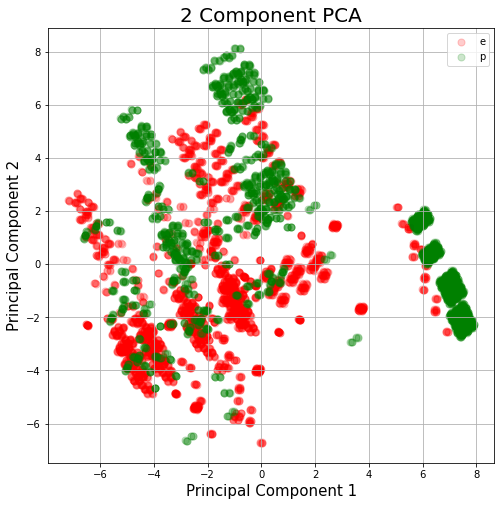

In [21]:
# visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['e', 'p']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              ,  alpha = 0.2)
ax.legend(targets)
ax.grid()

In [22]:
# Choosing the right number of dimensions
# How many variables could account for 95% variance.
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print(d)

10


In [23]:
# PCA

pca = PCA(n_components = d)
X_10D = pca.fit_transform(X)

#print(sum(pca.explained_variance_ratio_))

In [24]:
df_10D = pd.concat([df_ec['class'],pd.DataFrame(X_10D)],axis=1)

In [25]:
df_10D.head()

,class,0,1,2,3,4,5,6,7,8,9
0,1,0.227967,-0.346115,-1.424099,-1.248098,2.088075,2.647938,-1.029328,3.642536,-0.925853,0.366047
1,0,-1.937132,4.795939,-3.512184,-1.248272,0.549882,-0.283598,2.550986,-0.620545,0.231919,0.071637
2,0,-1.654512,2.463813,-3.881439,1.218642,1.043769,-2.052202,-2.192067,0.669014,-0.188370,0.330477
3,1,-1.252380,1.678875,-3.565712,0.586422,0.680268,2.793761,-0.393990,4.161018,-1.013840,-0.498848
4,0,1.580976,-1.002829,-1.255122,-1.969164,0.069668,3.303160,-1.256111,-2.007016,0.601937,-1.346899


# Part 4: Logistic Regression

In [26]:
class LogisticRegression:
    def  __init__(self, df,learningRate, tolerance, maxIteration = 50000):
        self.df = df
        self.learningRate = learningRate
        self.tolerance  = tolerance
        self.maxIteration = maxIteration
        
        
    def dataset_reader(self,df):
        
        df_shuffle = df.sample(frac=1).reset_index(drop=True)
        thre = 0.2
        row = df_shuffle.shape[0]
        train_row = round(row*(1-thre))
        
        train_df = df_shuffle.iloc[:train_row,:]
        test_df = df_shuffle.iloc[train_row:,:]
        
        train_df = np.array(train_df, dtype = np.float64)
        test_df = np.array(test_df, dtype = np.float64)
        
        X_train,y_train = train_df[:,1:],train_df[:,0]
        X_test, y_test = test_df[:,1:], test_df[:,0]
        
        return X_train, X_test, y_train,y_test
    
    def add_x0(self, X):
        
        return np.column_stack([np.ones(X.shape[0],1),X])
    
    def sigmoid(self,z):
        
        sig = 1 / (1 + np.exp(-z))
        
        return sig
    
    def cost_function(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        
        #pred = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        #cost = pred.sum()
        
        # or:
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(sig)) - X.dot(self.w).dot(y)
        cost  = pred_.sum()
        
        return cost
    
    def gradient(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad 
    
    def gradient_decent(self, X, y):
        
        cost_sequence = []
        
        last_cost = float('inf')
        tolerance_counter = 0
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w = self.w - self.learningRate * self.gradient(X,y)
            current_cost = self.cost_function(X,y)
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            #if diff < self.tolerance:
                #tolerance_counter += 1
                #print("The model stopped - no further improvement")
                #break
                
        self.plot_cost(cost_sequence)
        return
    
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        
        ax.grid()
        plt.legend(bbox_to_anchor = (1.05, 1), shadow = True)
        plt.show()
        
    def predict(self, X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision
            
        
    def run_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.dataset_reader(self.df)
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradient_decent(self.X_train, self.y_train)
        
        print(self.w)
        
        y_hat = self.predict(self.X_test)
        accuracy, recall, precision = self.evaluate(self.y_test, y_hat)
        
        print('Accuracy: ', accuracy)
        print('Recall: ', recall)
        print('precision: ', precision)

In [27]:
lr = LogisticRegression(df = df_10D,tolerance = 0.0, learningRate = 0.1e-5,maxIteration = 100000)

100%|██████████| 100000/100000 [00:28<00:00, 3549.17it/s]
No handles with labels found to put in legend.


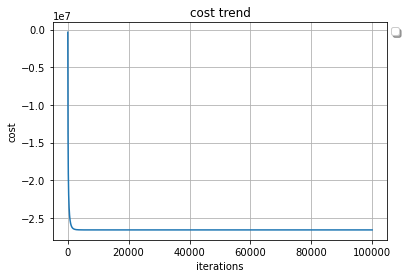

[ 0.31594875  0.33996508  0.317262    0.08364984  0.21031191 -0.03425116
  0.23993703  0.0528333  -0.01909952 -0.17091403]
Accuracy:  0.8166153846153846
Recall:  0.7745740498034076
precision:  0.8242677824267782


In [28]:
lr.run_model()

In [29]:
# use sklearn package

from sklearn.model_selection import train_test_split

X = df_10D.iloc[:,1:]
y = df_10D.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)


In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracies = dict()
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.827076923076923


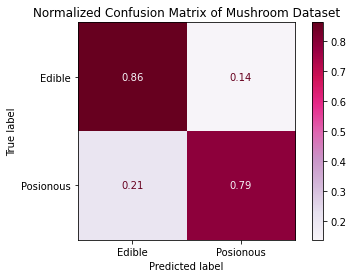

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# Part 5: Support Vector Machine

In [33]:
# standard scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
# hard margin SVM

class SVM:
    def __init__(self, learningrate = 0.001, _lambda = 0.001, n_iters = 100):
        self.learningrate = learningrate
        self._lambda = _lambda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape[0], X.shape[1]
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    self.w -= self.learningrate * (2 * self._lambda * self.w)
                else: 
                    self.w -= self.learningrate * (2 * self._lambda * self.w - np.dot(y_[idx], x_i))
                    self.b -= self.learningrate * (-y_[idx])
                    
        def predict(self, X):
            y_hat = np.dot(X, sel.w) + self.b
            return np.sign(y_hat)
        
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision

In [42]:
clf = SVM()
clf.fit(X_train,y_train)
print(clf.w, clf.b)

[ 1.04240034  0.71643397  0.63802415  0.14793995  0.23294137 -0.08857227
  0.30194824 -0.05358867  0.02178936 -0.06752163] -0.1520000000000001


In [46]:
y_hat_test = np.where((np.dot(X_test, clf.w) + clf.b) <= 0, 0, 1)
y_hat_test

print('accuracy:',clf.evaluate(y_test, y_hat_test)[0])
print('recall:',clf.evaluate(y_test, y_hat_test)[1])
print('precision:',clf.evaluate(y_test, y_hat_test)[2])

# accuracy = 1 - sum(abs(y_hat_test - y_test)) / len(y_test)
# accuracy

accuracy: 0.8356923076923077
recall: 0.7748756218905473
precision: 0.8787023977433004


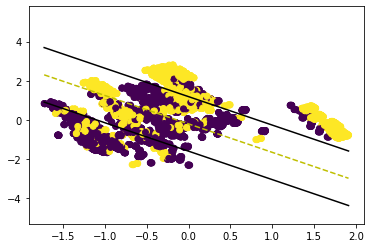

In [47]:
visualize_svm(X_train,y_train,clf)

In [48]:
y = np.array([1])
y[:, np.newaxis].shape

(1, 1)

In [49]:
# use scikit package to varify the answer 
# here we use gussian RBF method
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies = dict()

accuracies['RBF_kernel SVM'] = accuracy_score(y_test, y_pred)
print('Accuracy is:' + str(accuracy_score(y_test, y_pred)))

Accuracy is:0.9956923076923077


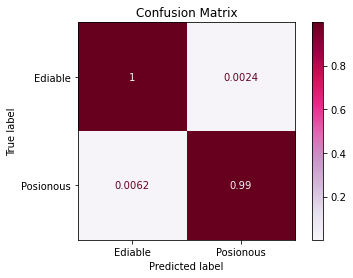

In [50]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['Ediable', 'Posionous'], cmap = plt.cm.PuRd,
                            normalize = 'true')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# we use soft margin margin SVM:
from sklearn.svm import LinearSVC
classifier_2 = LinearSVC(C = 1, loss = 'hinge')

classifier_2.fit(X_train, y_train)

y_pred_2 = classifier_2.predict(X_test)

accuracies_2 = dict()

accuracies_2['soft margin SVM'] = accuracy_score(y_test, y_pred_2)
print('Accuracy is:' + str(accuracy_score(y_test, y_pred_2)))


Accuracy is:0.8363076923076923


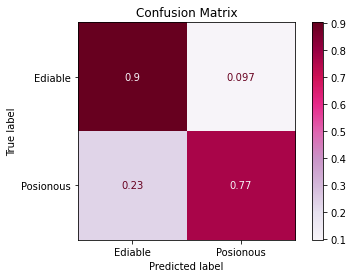

In [52]:
disp = plot_confusion_matrix(classifier_2, X_test, y_test, display_labels = ['Ediable', 'Posionous'], cmap = plt.cm.PuRd,
                            normalize = 'true')
plt.title('Confusion Matrix')
plt.show()